# Parte 2: Match Template múltiple
Reconocimiento de un patrón en varios lugares de una imagen

In [1]:
# Librerías principales
import numpy as np
import cv2 as cv
import matplotlib
from matplotlib import pyplot as plt

import imutils
from imutils.object_detection import non_max_suppression
# Tipo de visualización
%matplotlib inline

# Versiones de librerías
print("".join(f"{x[0]}: {x[1]}\n" for x in [
    ("Numpy",np.__version__),
    ("openCV",cv.__version__),
    ("Matplotlib",matplotlib.__version__),
]))

Numpy: 1.22.3
openCV: 4.5.5
Matplotlib: 3.5.1



In [96]:
# Definición de la ruta para levantar las imagenes
TEMPLATE_DIR = '.\Template'
IMG_DIR = '.\images'
IMG_NAME = 'coca_multi.png'
TEMPLATE_NAME = 'pattern.png'

## Imágenes
Se levantan las imágenes que se emplearán como prueba del algoritmo. Se verifica el orden de los canales de color


In [97]:
# Carga de imágenes
image = cv.imread(os.path.join(IMG_DIR, IMG_NAME))

# Carga de template
template = cv.imread(os.path.join(TEMPLATE_DIR, TEMPLATE_NAME))

In [90]:
# Preparación de imágenes
img_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
t_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)

# Condiciones para el template
t_canny = cv.Canny(t_gray, 50, 100)
tW, tH = template.shape[:2]

# Parámetros del algoritmo
scale = 2
threshold = 0.04

# Reescalado de imagen
dim = (int(img_gray.shape[1] * scale), int(img_gray.shape[0] * scale))
resized = cv.resize(img_gray, dim, interpolation = cv.INTER_AREA)
rX = img_gray.shape[1] / float(resized.shape[1])
rY = img_gray.shape[0] / float(resized.shape[0])
# Detección de bordes en la imagen reescalada
edged = cv.Canny(resized, 50, 100)
# Match Template
result = cv.matchTemplate(edged, t_canny, cv.TM_CCOEFF_NORMED)
print('Número de resultados ANTES de aplicar NMS:', len(result))

Número de resultados ANTES de aplicar NMS: 1022


In [91]:
# Unbox de las detecciones
rectangles = []
loc = np.where(result >= threshold)
for pt in zip(*loc[::-1]):
    top_left = (int(pt[0] * rX), int(pt[1] * rY))
    bottom_right = (int((pt[0] + tW) * rX), int((pt[1] + tH) * rY))
    rectangles.append([top_left[0], top_left[1], bottom_right[0], bottom_right[1]])



In [92]:
# Aplicación de Non Max Supression
nms = non_max_suppression(np.array(rectangles))
print('Número de resultados DESPUÉS de aplicar NMS:', len(nms))
print('Check de valores nms: \n', nms)

Número de resultados DESPUÉS de aplicar NMS: 1
Check de valores nms: 
 [[118 140 206 340]]


In [93]:
# Imagen final con las detecciones
img_final = cv.cvtColor(img_prueba, cv.COLOR_BGR2RGB)
for (startX, startY, endX, endY) in nms:
    cv.rectangle(img_final, (startX, startY), (endX, endY), (0,255,0),2)

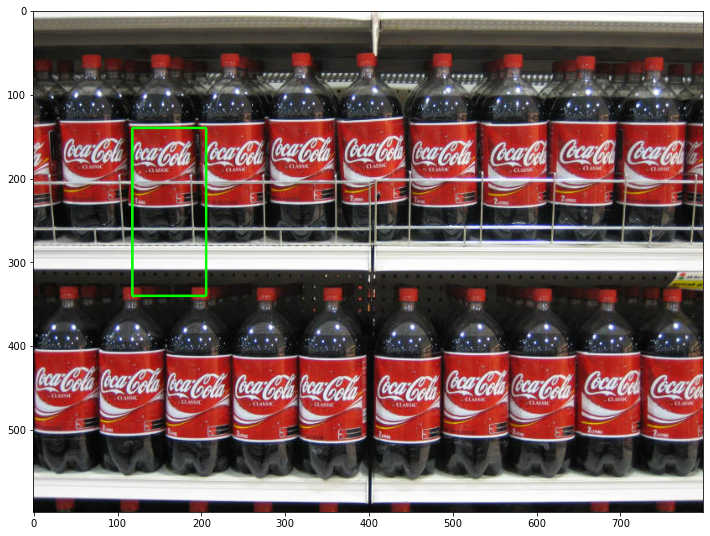

In [94]:
# Resultado
fig = plt.figure(figsize=(12, 10))
plt.imshow(img_final, cmap='gray')
plt.show()